In [9]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [24]:
import tensorflow 

In [3]:
from tensorflow.keras.optimizers import SGD

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.applications import VGG16

In [6]:
from tensorflow.keras.layers import Input,Dense,Dropout,GlobalAveragePooling2D

In [25]:
np.random.seed(42)
tensorflow.random.set_seed(42)

In [38]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")

test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


In [43]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


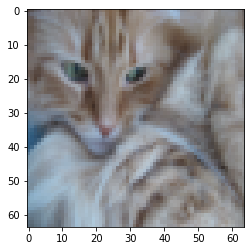

In [51]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [54]:
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]

test_set_x = test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

In [55]:
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [56]:
print("Validation data size: ", validation_x.shape)
print("Validation data size: ", validation_y.shape)

Validation data size:  (25, 64, 64, 3)
Validation data size:  (25,)


In [57]:
print("test_set_x shape: ", test_set_x.shape)
print("test_set_y shape: ", test_set_y.shape)

test_set_x shape:  (25, 64, 64, 3)
test_set_y shape:  (25,)


In [71]:
vgg_base = VGG16(weights='imagenet', include_top=False)

vgg_base.trainable=False

58900480/58889256 [==============================] - 1s 0us/step


In [76]:
inp = Input(shape=(64, 64, 3), name='image_input')

In [77]:
#initiate a model
vgg_model = Sequential()

In [78]:
#Add the VGG base model
vgg_model.add(vgg_base)

In [79]:
vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

In [84]:
sgd = SGD(learning_rate=0.025)

In [85]:
vgg_model.compile(loss="binary_crossentropy", optimizer=sgd,    metrics=['accuracy'])

In [90]:
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=10, verbose=1, 
              validation_data=(validation_x, validation_y))

Epoch 1/10
7/7 [==============================] - 5s 575ms/step - loss: 58.7498 - accuracy: 0.5120 - val_loss: 0.9869 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 4s 527ms/step - loss: 1.0473 - accuracy: 0.5837 - val_loss: 0.3365 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 4s 508ms/step - loss: 0.6690 - accuracy: 0.7273 - val_loss: 0.3600 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 4s 505ms/step - loss: 0.5443 - accuracy: 0.7608 - val_loss: 0.4032 - val_accuracy: 0.7600
Epoch 5/10
7/7 [==============================] - 4s 506ms/step - loss: 0.4485 - accuracy: 0.8086 - val_loss: 0.2385 - val_accuracy: 0.8800
Epoch 6/10
7/7 [==============================] - 4s 530ms/step - loss: 0.3949 - accuracy: 0.8565 - val_loss: 0.2640 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 5s 658ms/step - loss: 0.3853 - accuracy: 0.8469 - val_loss: 0.2344 - val_accuracy: 0.9600
Epoch 8/10
7/7 [===

In [95]:
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)

2/2 [==============================] - 1s 268ms/step - loss: 4.6343 - accuracy: 0.3600


In [96]:
print('Test accuracy using VGG16 model as the base:', vgg_model_acc)

Test accuracy using VGG16 model as the base: 0.36000001430511475


In [100]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [101]:
from tensorflow.keras.utils import plot_model

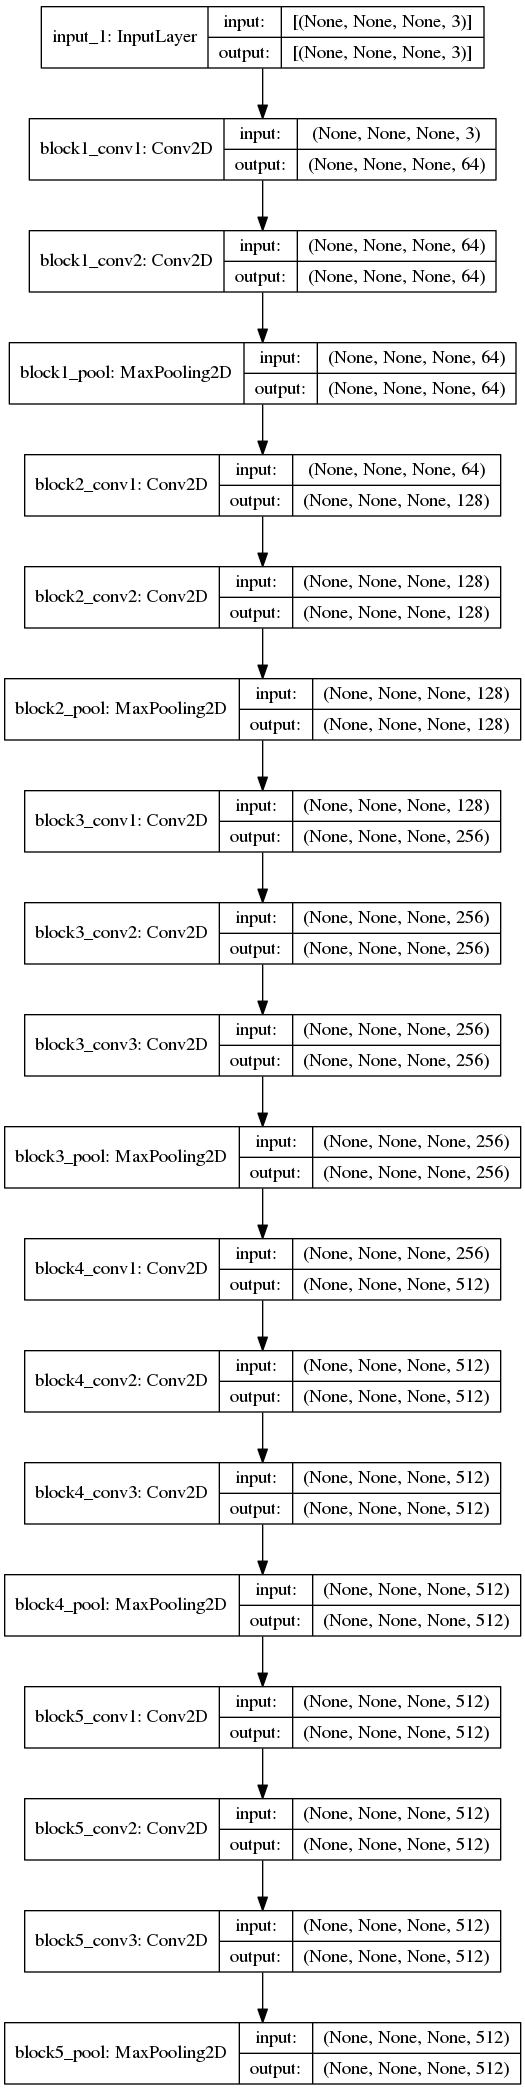

In [102]:
plot_model(vgg_base, show_shapes=True, show_layer_names=True)

In [103]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

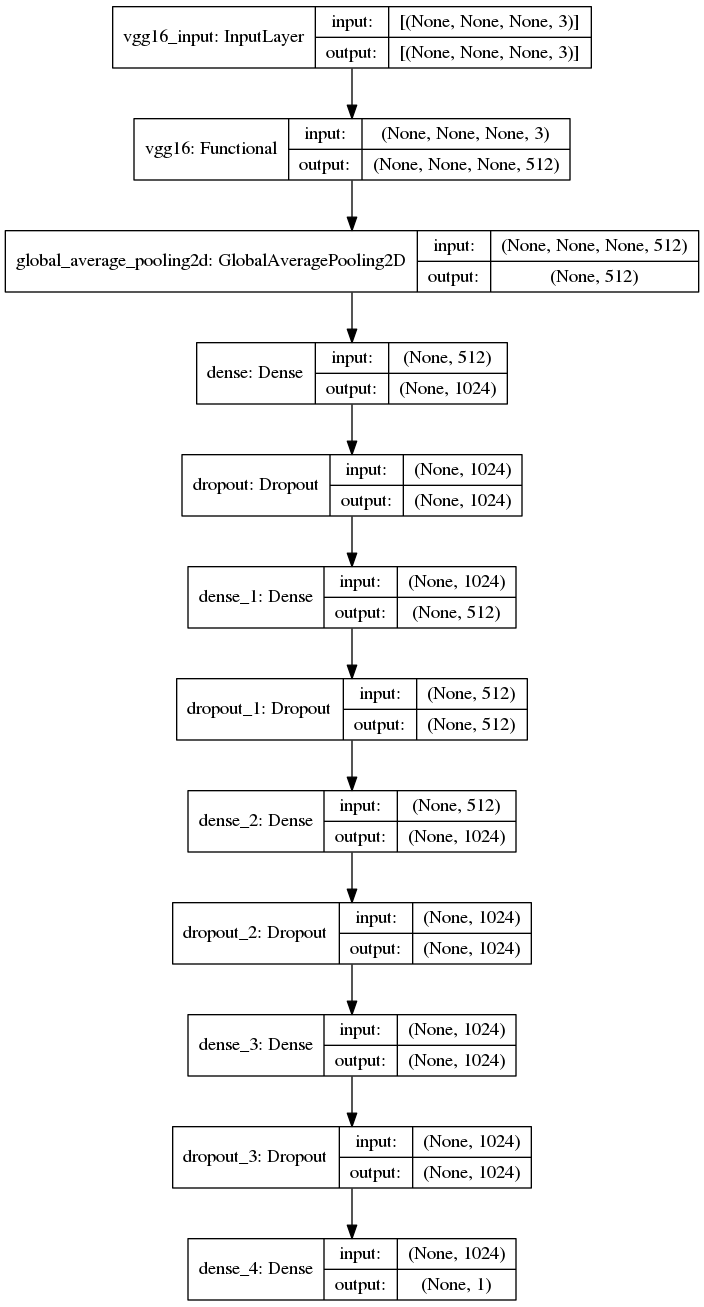

In [104]:
plot_model(vgg_model, show_shapes=True, show_layer_names=True)